In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [3]:
x_values = np.array([1,2,3,4,5])
y_true = np.array([2.3, 2.9, 3.6, 4.1, 5])

m = 0.5 #slope
c = 2   #intersept

y_pred_manual = m * x_values + c
residuals = y_true - y_pred_manual
squared_residuals = residuals ** 2

In [4]:
y_pred_manual

array([2.5, 3. , 3.5, 4. , 4.5])

In [5]:
residuals

array([-0.2, -0.1,  0.1,  0.1,  0.5])

In [6]:
squared_residuals

array([0.04, 0.01, 0.01, 0.01, 0.25])

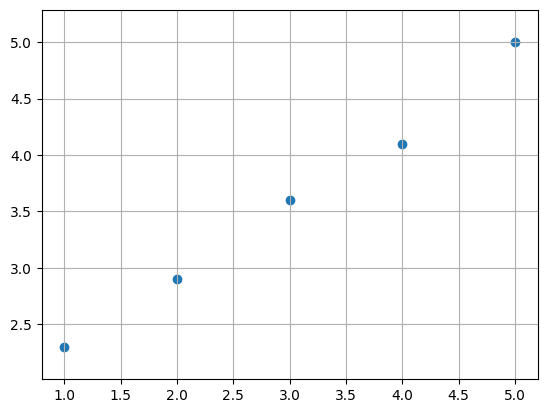

In [7]:
plt.axis('equal')
plt.grid(True)
plt.scatter(x_values, y_true)

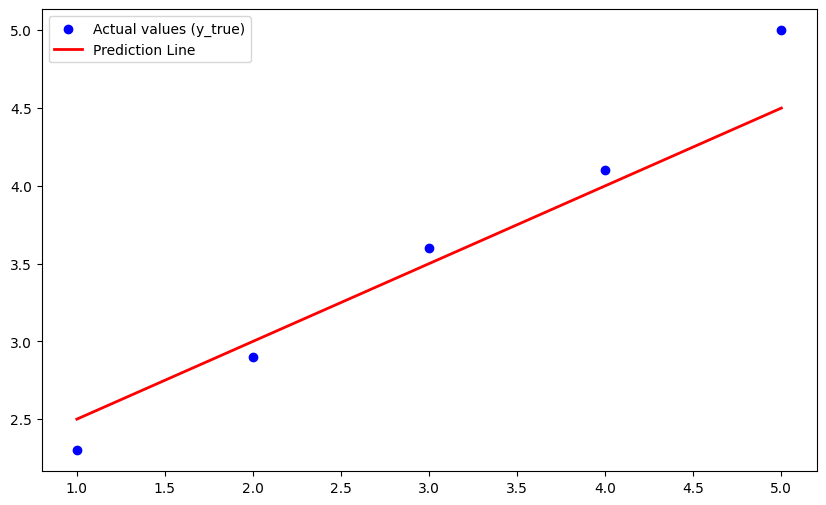

In [8]:
# Plot actual and predicted values
plt.figure(figsize = (10,6))
plt.scatter(x_values, y_true, color='blue', label='Actual values (y_true)')
plt.plot(x_values, y_pred_manual, color='red', label='Prediction Line', linewidth=2)
plt.legend()

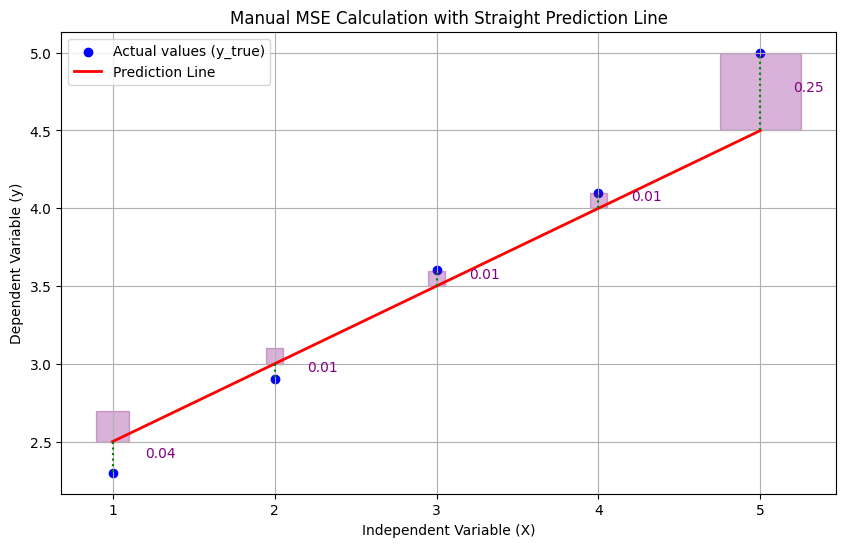

In [9]:
plt.figure(figsize = (10,6))
plt.scatter(x_values, y_true, color='blue', label='Actual values (y_true)')
plt.plot(x_values, y_pred_manual, color='red', label='Prediction Line', linewidth=2)

# Draw vertical lines for residuals and squares for squared residuals
for i in range(len(x_values)):
    # Draw vertical lines for residuals
    plt.vlines(x_values[i], y_pred_manual[i], y_true[i], color='green', linestyle='dotted')
    
    # Draw squares representing squared residuals
    square_side = np.abs(residuals[i])  # Side length of the square is the residual
    square = plt.Rectangle((x_values[i] - square_side / 2, y_pred_manual[i]), 
                           square_side, square_side, color='purple', alpha=0.3)
    plt.gca().add_patch(square)
    
    # Label the square with the squared residual value
    plt.text(x_values[i] + 0.2, (y_pred_manual[i] + y_true[i]) / 2, f'{squared_residuals[i]:.2f}',
             color='purple')

# Adding labels and titles
plt.title('Manual MSE Calculation with Straight Prediction Line')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (y)')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

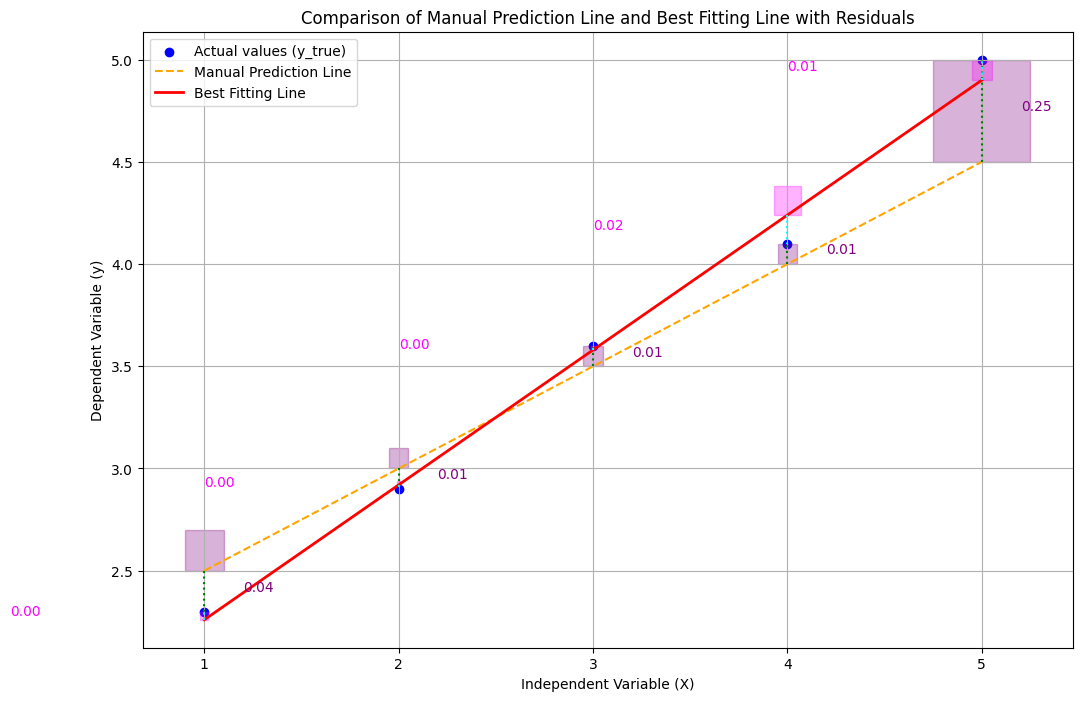

In [10]:
# Define five manual data points
x_values = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Reshape for sklearn
y_true = np.array([2.3, 2.9, 3.6, 4.1, 5.0])

# Define a manually set linear equation for prediction
manual_slope = 0.5
manual_intercept = 2.0
y_pred_manual = manual_slope * x_values + manual_intercept

# Create and fit the linear regression model
model = LinearRegression()
model.fit(x_values, y_true)

# Get the predicted values and coefficients from the linear regression model
y_pred_best_fit = model.predict(x_values)

# Calculate residuals and squared residuals for manual prediction
residuals_manual = y_true.flatten() - y_pred_manual.flatten()
squared_residuals_manual = residuals_manual ** 2

# Calculate residuals and squared residuals for best fit line
residuals_best_fit = y_true.flatten() - y_pred_best_fit
squared_residuals_best_fit = residuals_best_fit ** 2

# Plot the actual values, manual prediction line, and best fitting line
plt.figure(figsize=(12, 8))
plt.scatter(x_values, y_true, color='blue', label='Actual values (y_true)')
plt.plot(x_values, y_pred_manual, color='orange', linestyle='--', label='Manual Prediction Line')
plt.plot(x_values, y_pred_best_fit, color='red', label='Best Fitting Line', linewidth=2)

# Draw vertical lines for residuals and squares for squared residuals for both lines
for i in range(len(x_values)):
    # Residuals for the manual prediction line
    plt.vlines(x_values[i], y_pred_manual[i], y_true[i], color='green', linestyle='dotted')
    square_side_manual = np.abs(residuals_manual[i])
    plt.gca().add_patch(plt.Rectangle((x_values[i] - square_side_manual / 2, y_pred_manual[i]), 
                                      square_side_manual, square_side_manual, color='purple', alpha=0.3))
    plt.text(x_values[i] + 0.2, (y_pred_manual[i] + y_true[i]) / 2, f'{squared_residuals_manual[i]:.2f}',
             color='purple')

    # Residuals for the best fitting line
    plt.vlines(x_values[i], y_pred_best_fit[i], y_true[i], color='cyan', linestyle='dotted')
    square_side_best_fit = np.abs(residuals_best_fit[i])
    plt.gca().add_patch(plt.Rectangle((x_values[i] - square_side_best_fit / 2, y_pred_best_fit[i]), 
                                      square_side_best_fit, square_side_best_fit, color='magenta', alpha=0.3))
    plt.text(x_values[i] - 1.0, (y_pred_best_fit[i] + y_true[i]) / 2, f'{squared_residuals_best_fit[i]:.2f}',
             color='magenta')

# Adding labels and titles
plt.title('Comparison of Manual Prediction Line and Best Fitting Line with Residuals')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (y)')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


In [11]:
# Define a manually set linear equation for prediction
manual_slope = 0.5
manual_intercept = 2.0

best_line_slope = model.coef_[0]
best_line_intercept = model.intercept_

print(best_line_slope, best_line_intercept )

0.6600000000000001 1.5999999999999992


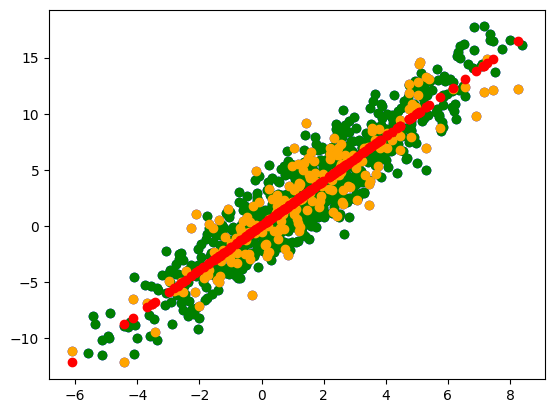

In [12]:
np.random.seed(0)
X = 2.5 * np.random.randn(1000) + 1.5 # Independent variable
y = 2 * X + np.random.randn(1000) * 2 # Dependent variable
data = pd.DataFrame({'X':X, 'y':y})

plt.scatter(X, y, color = 'blue', label = 'Synthetic Data Points')

# Split into training and testing sets
X = data[['X']] #Features
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Visualize training vs testing
plt.scatter(X_train, y_train, color='green', label='Training data')
plt.scatter(X_test, y_test, color='orange', label='Test data')
plt.scatter(X_test, y_pred, color = 'red', label = 'Prediction')
plt.show()

In [13]:
mse_sklearn = mean_squared_error(y_test, y_pred)
mse_sklearn

4.306277528038681

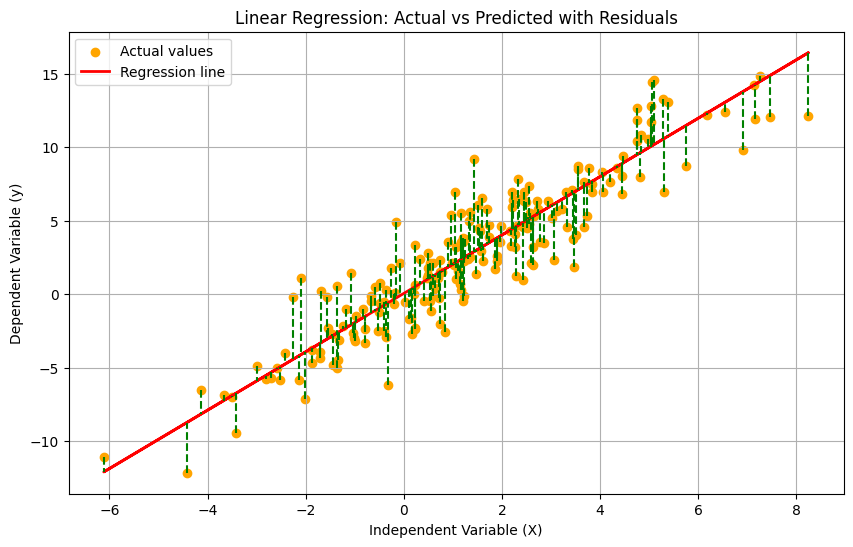

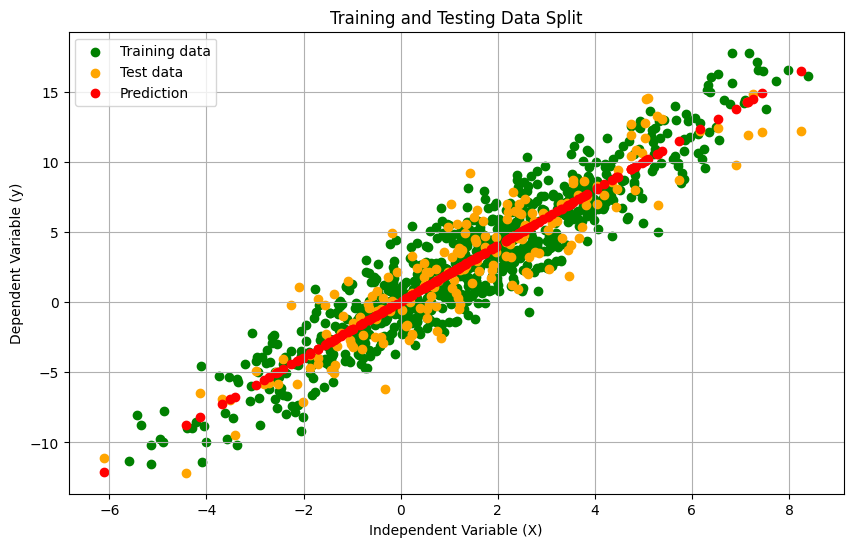

In [14]:
# Plot the actual values, predicted values, and residuals for the test dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='orange', label='Actual values')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')

# Visualizing the residuals for each point in the test set
for i in range(len(X_test)):
    plt.vlines(X_test.iloc[i], y_test.iloc[i], y_pred[i], color='green', linestyle='--')

# Adding labels and titles
plt.title('Linear Regression: Actual vs Predicted with Residuals')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (y)')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

# Visualize training vs testing
plt.figure(figsize=(10, 6))
# Adding labels and title
plt.title('Training and Testing Data Split')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (y)')
plt.scatter(X_train, y_train, color='green', label='Training data')
plt.scatter(X_test, y_test, color='orange', label='Test data')
plt.scatter(X_test, y_pred, color = 'red', label = 'Prediction')
plt.legend()
plt.grid(True)
plt.show()